In [709]:
#scatter plot for tumor volume change over time with each treatment
#scatter plot that shows how the number of metastatic sites change over time for each treatment 
#scatter plot for the number of mice alive through the course of the treatment 
#bar graph that compares the total % tumor volume change for each drug across the full 45 days (tumor growth as red
# and tumor reduction as green)
# ErrorBars for scatter plots pandas.DataFrame.sem for calculations 

In [710]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

combined_data = pd.merge(trial_data, mouse_data, on='Mouse ID', how='outer')


combined1 = combined_data.loc[combined_data["Timepoint"] == 0,:]
combined1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
10,f932,0,45.0,0,Ketapril
11,g107,0,45.0,0,Ketapril
19,a457,0,45.0,0,Ketapril
22,c819,0,45.0,0,Ketapril


In [711]:
combined_data1 = combined_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
combined_mean = combined_data1.groupby(["Drug","Timepoint"]).mean()
combined_mean = combined_mean.unstack(level=0)
combined_mean.columns = combined_mean.columns.droplevel()
print("Average Tumor Volume by Drug and Timepoint:")
print("--------------------------------------------")
combined_mean

Average Tumor Volume by Drug and Timepoint:
--------------------------------------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [712]:

combined_sem = combined_data1.groupby(["Drug","Timepoint"]).sem()
combined_sem = combined_sem.unstack(level=0)
combined_sem.columns = combined_sem.columns.droplevel()
print("Average Standard Error:")
print("-----------------------")
combined_sem

Average Standard Error:
-----------------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [713]:
combined_data2 = combined_data1.groupby(["Drug","Timepoint"]).mean()
combined_data_2 = combined_data2.unstack(level=0)
combined_data_2.columns = combined_data_2.columns.droplevel()
print("Avg Tumor Vol:")
print("--------------")
combined_data_2

Avg Tumor Vol:
--------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


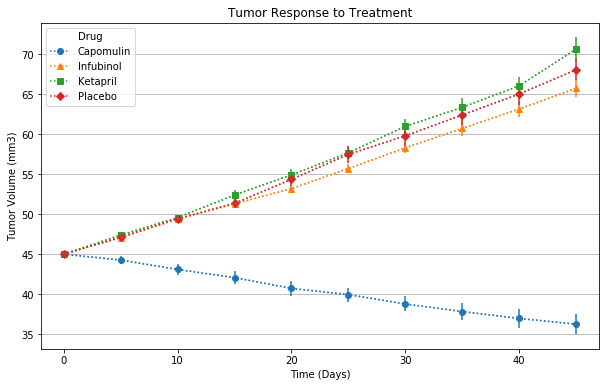

In [714]:
combined = combined_data_2[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
combined_sem = combined_sem[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

ax = combined.plot(figsize=(10,6), linestyle=":", yerr =combined_sem, legend=False)
ax.set_prop_cycle(None)
combined.plot(figsize=(10,6), style=['o:','^:', 's:', 'D:'], ax = ax)

ax.set_xlim(-2,47)
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(axis='y')


In [715]:
combined_data3 = combined_data[['Drug', 'Timepoint', 'Metastatic Sites']]
met_mean1 = combined_data3.groupby(["Drug","Timepoint"]).mean()
met_mean1 = met_mean1.unstack(level=0)
met_mean1.columns = met_mean1.columns.droplevel()
print("Average Number of Metastatic Sites by Drug and Timepoint:")
print("---------------------------------------------------------")
met_mean1

Average Number of Metastatic Sites by Drug and Timepoint:
---------------------------------------------------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [716]:
met_sem1 = combined_data3.groupby(["Drug","Timepoint"]).sem()
met_sem1 = met_sem1.unstack(level=0)
met_sem1.columns = met_sem1.columns.droplevel()
print("Avg SEM by Metastatic Sites:")
print("----------------------------")
met_sem1

Avg SEM by Metastatic Sites:
----------------------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [717]:
print("Avg Tumor Vol:")
print("--------------")
combined_data_2

Avg Tumor Vol:
--------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


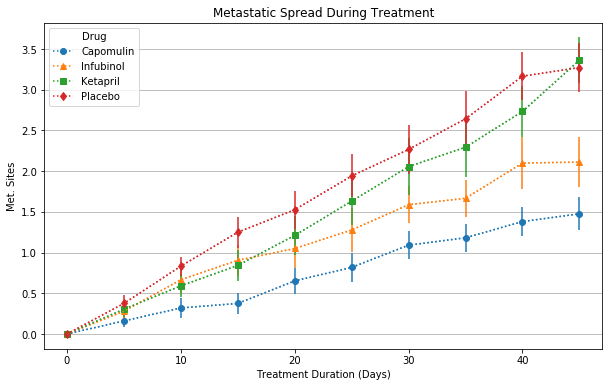

In [718]:
met_sem1 = met_sem1[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
met_mean1 = met_mean1[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
ax2 = met_mean1.plot(figsize=(10,6), linestyle=":", yerr =met_sem1, legend=False)
ax2.set_prop_cycle(None)
met_mean1.plot(figsize=(10,6), style=['o:','^:', 's:', 'd:'], ax = ax2)
ax2.set_xlim(-2,47)
ax2.set_title("Metastatic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Met. Sites")
ax2.grid(axis='y')

In [719]:
combined_count = combined_data[["Drug", "Timepoint","Mouse ID"]]
combined_count1 = combined_count.groupby(["Drug","Timepoint"]).count()
combined_count1 = combined_count1.unstack(level=0)
combined_count1.columns = combined_count1.columns.droplevel()
print("Survival Rate:")
print("--------------")
combined_count1

Survival Rate:
--------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [720]:

combined_count2 = combined_count.groupby(["Drug","Timepoint"]).count()*4
combined_count2 = combined_count2.unstack(level=0)
combined_count2.columns = combined_count2.columns.droplevel()
print("% Survival Rate:")
print("----------------")
combined_count2

% Survival Rate:
----------------


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,104,100,104,100
5,100,84,100,92,92,96,100,100,100,96
10,100,80,84,88,84,96,92,96,92,88
15,96,76,84,76,84,80,68,96,92,84
20,92,72,80,76,80,76,68,92,84,68
25,88,72,72,76,72,68,56,92,76,64
30,88,64,68,72,60,60,52,92,72,60
35,88,56,48,68,60,56,40,84,64,56
40,84,56,40,60,60,48,36,80,48,56


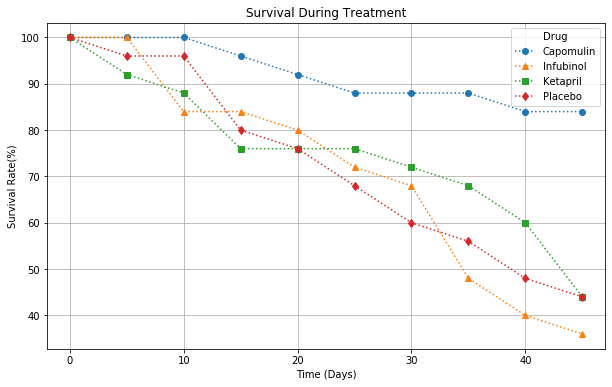

In [721]:
combined_count_1 = combined_count2[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
ax3 = combined_count_1.plot(figsize=(10,6), style=['o:','^:', 's:', 'd:'])
ax3.set_xlim(-2,47)
ax3.set_title("Survival During Treatment")
ax3.set_xlabel("Time (Days)")
ax3.set_ylabel("Survival Rate(%)")
ax3.grid()

In [722]:
combined_data2['pct'] = 100 * (combined_data2/combined_data2.iloc[0]- 1)
del combined_data2['Tumor Volume (mm3)']

combined_data2 = combined_data2.unstack(level=1)
combined_data2.columns = combined_data2.columns.droplevel()
combined_sum = combined_data2.iloc[:,9]
print("Average % Tumor Volume Change:")
print("------------------------------")
combined_sum

Average % Tumor Volume Change:
------------------------------


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

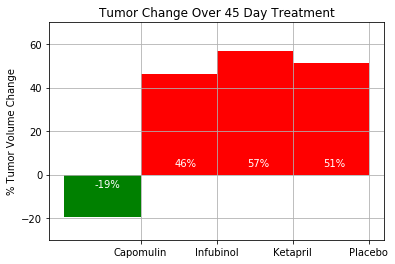

In [723]:
sum_bar = combined_sum[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
colors = []
tumor_vol = []
for i in sum_bar:
    if i > 0:
        color = 'r'
        colors.append(color)
        tumor_vol.append(i)
    else:
        color ='g'
        colors.append(color)
        tumor_vol.append(i)


formatted_list = ["%.0f"%item for item in tumor_vol]
tumor_vol = [string + '%' for string in formatted_list]
ax4 = sum_bar.plot.bar(color=colors, width=-1, align='edge')
ax4.set_title("Tumor Change Over 45 Day Treatment")
ax4.set_ylabel("% Tumor Volume Change")
ax4.set_xlabel("")
ax4.set_xlim(-1.2,3.2)
ax4.set_ylim(-30,70)
ax4.set_yticks(np.arange(-20, 70, 20))
ax4.tick_params(axis ='x',direction='out', rotation = 0) 
ax4.text(-.6,-6,tumor_vol[0], color='w')
ax4.text(.45,4,tumor_vol[1], color='w')
ax4.text(1.4,4,tumor_vol[2], color='w')
ax4.text(2.4,4,tumor_vol[3], color='w')
ax4.grid()
